In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 2: Copy and Unzip Dataset
!cp '/content/drive/MyDrive/Pneumonia/pneumonia.zip' '/content'


In [ ]:
!unzip pneumonia.zip


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:

# Step 3: Import Necessary Libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
# Step 4: Initialize Pre-trained VGG16 Model for Transfer Learning
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Step 5: Build the Classification Model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 6: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 7: Data Augmentation and Preprocessing

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Step 8: Load and Preprocess Training and Validation Data
train_generator = train_datagen.flow_from_directory('/content/chest_xray/train',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory('/content/chest_xray/val',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='binary')

Found 16 images belonging to 2 classes.


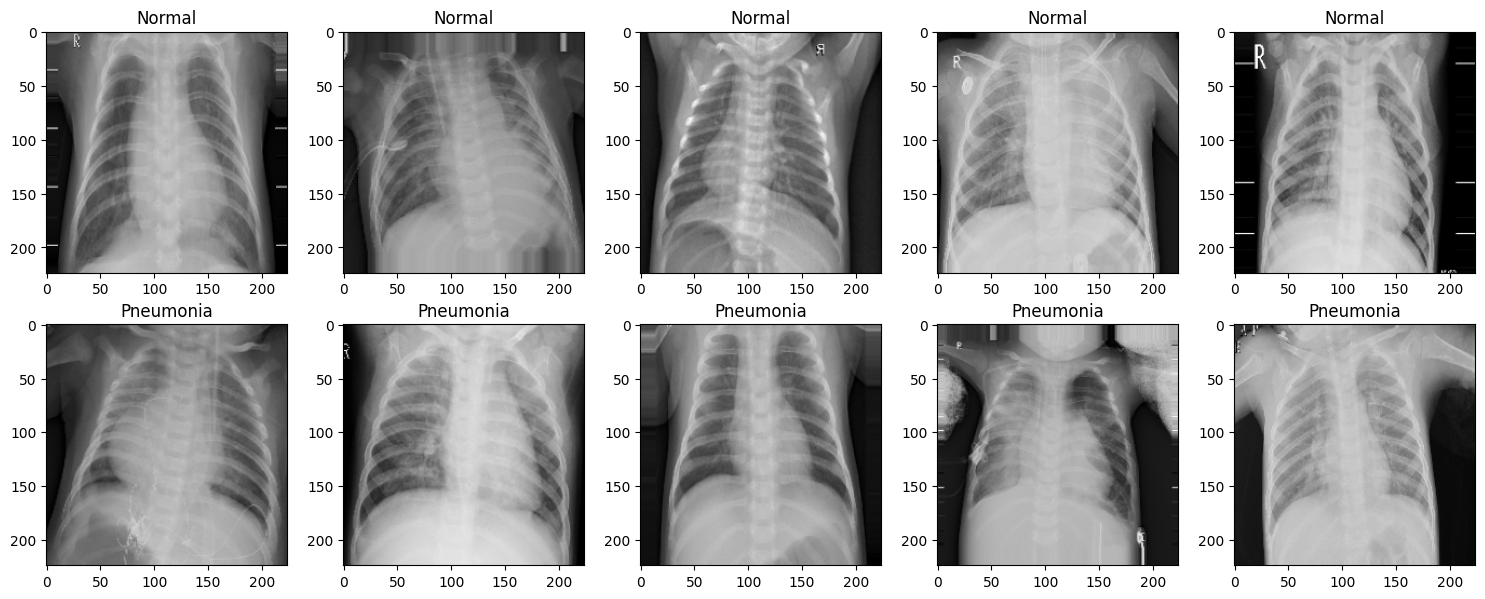

In [ ]:
# Step 9: Visualize Sample Images (Normal and Pneumonia Cases)

num_images_to_display = 5
train_iterator = iter(train_generator)  # Create an iterator from the generator
healthy_images, _ = next(train_iterator)  # Get the first batch of images
pneumonia_images, _ = next(train_iterator)  # Get the second batch of images

plt.figure(figsize=(15, 6))
for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(healthy_images[i])
    plt.title("Normal")

    plt.subplot(2, num_images_to_display, num_images_to_display + i + 1)
    plt.imshow(pneumonia_images[i])
    plt.title("Pneumonia")

plt.tight_layout()  # Adjust layout for better display
plt.show()  # Show the plot

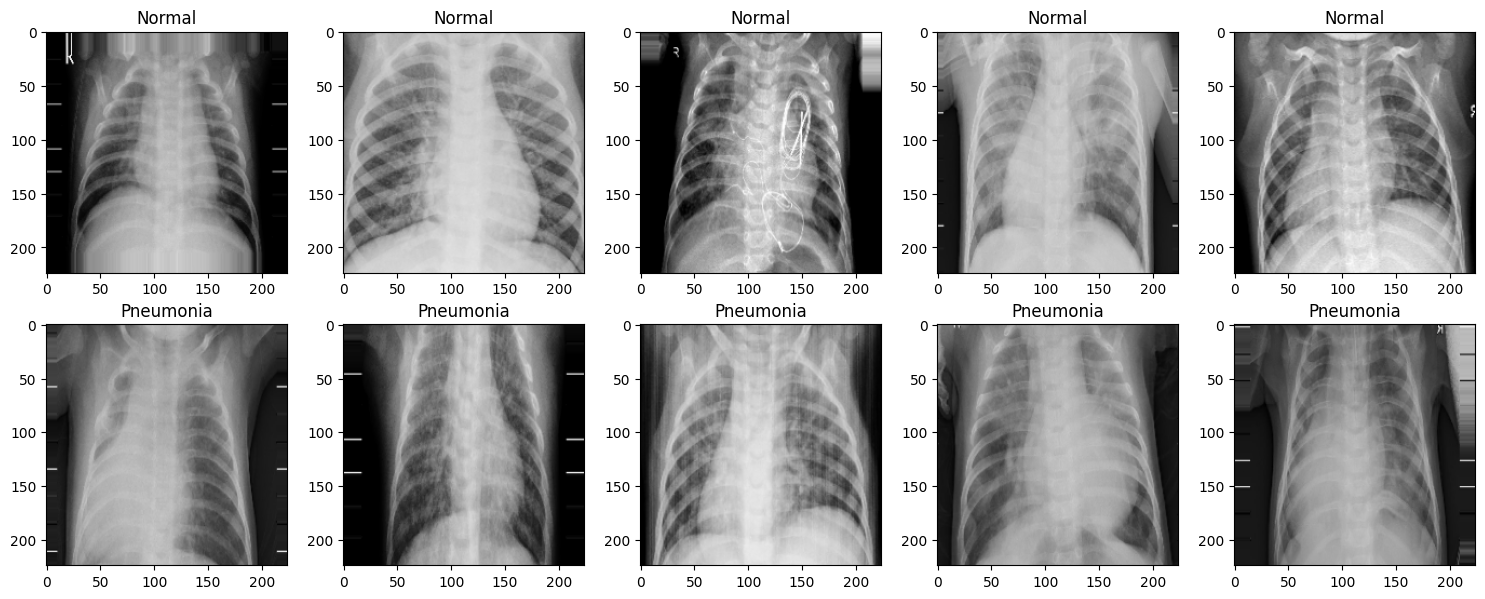

In [ ]:
# Step 10: Collect and Visualize More Sample Images

num_images_to_display = 5
healthy_images = []
pneumonia_images = []

# Collect images
for i in range(num_images_to_display):
    # Get one batch of healthy images
    h_imgs, _ = next(train_generator)  # Assuming first class is healthy
    healthy_images.append(h_imgs[0])  # Append the first image from the batch

for i in range(num_images_to_display):
    # Get one batch of pneumonia images
    p_imgs, _ = next(train_generator)  # Assuming second class is pneumonia
    pneumonia_images.append(p_imgs[0])  # Append the first image from the batch

plt.figure(figsize=(15, 6))
for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(healthy_images[i])
    plt.title("Normal")

    plt.subplot(2, num_images_to_display, num_images_to_display + i + 1)
    plt.imshow(pneumonia_images[i])
    plt.title("Pneumonia")

plt.tight_layout()  # Adjust layout for better display
plt.show()  # Show the plot

In [ ]:
# Step 11: Train the Model
history=model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 138s 704ms/step - accuracy: 0.8781 - loss: 0.4383 - val_accuracy: 0.8125 - val_loss: 0.3839
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 108s 639ms/step - accuracy: 0.9480 - loss: 0.1415 - val_accuracy: 0.6875 - val_loss: 0.6055
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 624ms/step - accuracy: 0.9578 - loss: 0.1097 - val_accuracy: 0.9375 - val_loss: 0.1725
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 607ms/step - accuracy: 0.9679 - loss: 0.0886 - val_accuracy: 0.9375 - val_loss: 0.1809
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 601ms/step - accuracy: 0.9652 - loss: 0.0954 - val_accuracy: 0.6875 - val_loss: 0.7489
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 614ms/step - accuracy: 0.9563 - loss: 0.1137 - val_accuracy: 1.0000 - val_loss: 0.1777
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 608ms/step - accuracy: 0.9698 - loss: 0.0771 - val_accuracy: 0.8750 - val_loss: 0.2320
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 618ms/step - accuracy: 0.9773 - loss: 0.05

In [ ]:
# Step 12: Predict Function for New Images
def predict_image(image_path, model, image_size=(224, 224)):
    img = image.load_img(image_path, target_size=image_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize

    prediction = model.predict(img)
    return "Normal" if prediction < 0.5 else "Pneumonia"

In [ ]:
# Step 13: Test Prediction on a New Image
img = '/content/chest_xray/train/NORMAL/IM-0129-0001.jpeg'


In [ ]:
prediction = predict_image(img, model)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Normal


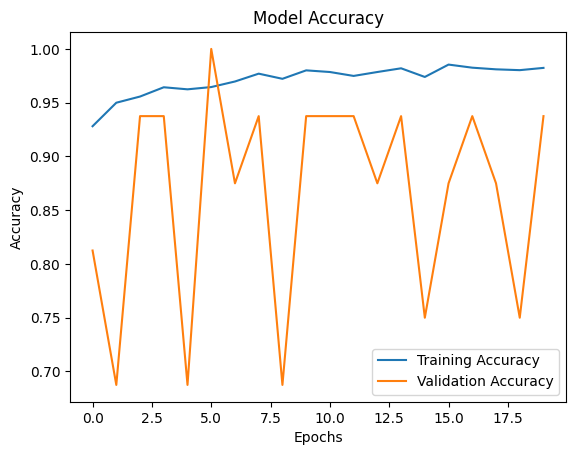

In [ ]:
# Step 14: Plot Training and Validation Accuracy

# Plotting training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

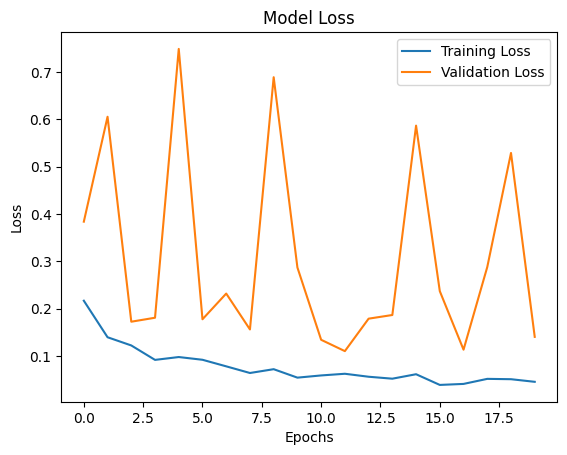

In [ ]:
# Step 15: Plot Training and Validation Loss

plt.plot(history.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Step 16: Save the Trained Model
model.save('pneumonia.h5')


In [ ]:
!cp '/content/pneumonia.h5' '/content/drive/MyDrive/Output_Pneumonia_Model'

In [ ]:
# Step 17: Build and Train a New Model (With Dropout)
from tensorflow.keras import layers, models


In [ ]:
base_model2 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model2.layers:
    layer.trainable = False
model1 = models.Sequential()
model1.add(base_model2)
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model1.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

# Step 18: Train the New Model
history1=model1.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 107s 606ms/step - accuracy: 0.8661 - loss: 0.3063 - val_accuracy: 0.6875 - val_loss: 0.8648
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 629ms/step - accuracy: 0.9423 - loss: 0.1462 - val_accuracy: 0.8125 - val_loss: 0.3436
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 138s 601ms/step - accuracy: 0.9522 - loss: 0.1203 - val_accuracy: 0.8125 - val_loss: 0.3584
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 597ms/step - accuracy: 0.9656 - loss: 0.0983 - val_accuracy: 0.6875 - val_loss: 0.4089
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 611ms/step - accuracy: 0.9581 - loss: 0.1114 - val_accuracy: 0.8125 - val_loss: 0.2649
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 603ms/step - accuracy: 0.9626 - loss: 0.1037 - val_accuracy: 0.8750 - val_loss: 0.2656
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 606ms/step - accuracy: 0.9617 - loss: 0.0929 - val_accuracy: 0.7500 - val_loss: 0.3535
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 145s 623ms/step - accuracy: 0.9657 -

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(image_path, model1, image_size=(224, 224)):
    img = image.load_img(image_path, target_size=image_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize

    prediction = model.predict(img)
    return "Normal" if prediction < 0.5 else "Pneumonia"

In [ ]:
# Step 19: Test Prediction on Another Image

img1= '/content/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg'


In [ ]:
prediction = predict_image(img1, model)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Pneumonia


In [ ]:
# Step 20: Save the New Model

model1.save('pneumonia1.h5')


In [ ]:
!cp '/content/pneumonia1.h5' '/content/drive/MyDrive/Output2_Pneum'


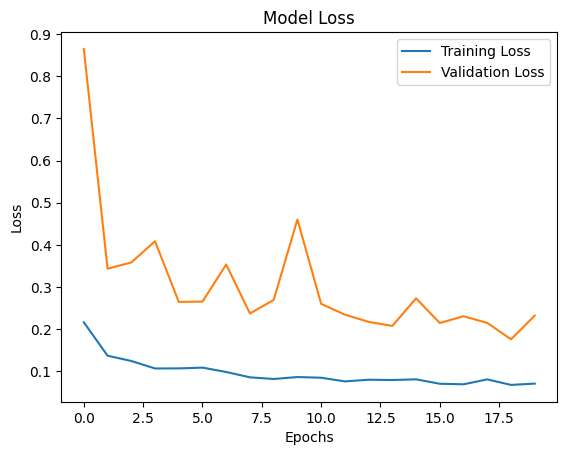

In [ ]:
# Step 21: Plot Loss and Accuracy for the New Model
plt.plot(history1.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history1.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

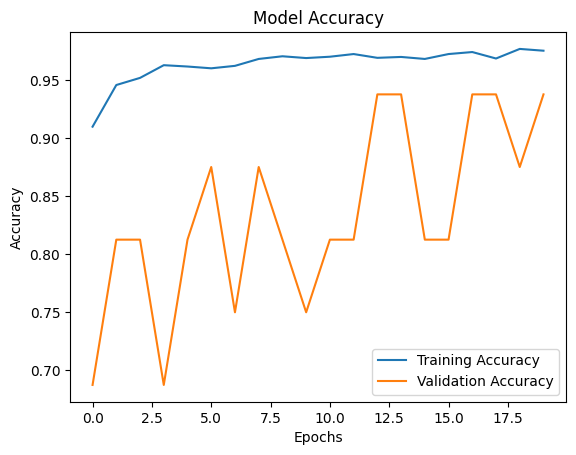

In [ ]:
# Plotting training accuracy
plt.plot(history1.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
Thank You